In [1]:
import numpy as np

In [2]:
import prediction_process as pp

## Lorenz timeseries definition:

In [3]:
x_train, y_true = pp.x_train, pp.y_true

## Bitcoin data 10 minute timeframe definition:

Taken from: https://www.kaggle.com/aakashverma8900/bitcoin-price-usd/version/1

In [4]:
bitcoin_train, bitcoin_test = pp.bitcoin_train, pp.bitcoin_test

## Energy consuption timeseries definition:

Taken from: https://www.kaggle.com/robikscube/hourly-energy-consumption?select=AEP_hourly.csv

In [5]:
el_train, el_test = pp.el_train, pp.el_test

I've looked at several sets and found electricity consumption series from https://www.kaggle.com/robikscube/hourly-energy-consumption?select=AEP_hourly.csv to be rather more feasible to predict compared to some other sets, according to the entropy-complexity plane below

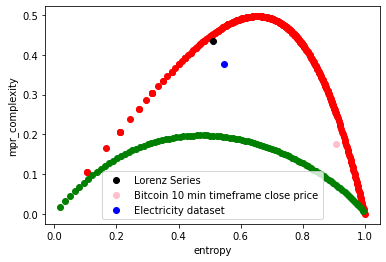

# Pattern and Sample/Motif sets:

In [6]:
pattern_set = [[i1, i2, i3] for i1 in np.arange(1, 11, 1)
               for i2 in np.arange(1, 11, 1)
               for i3 in np.arange(1, 11, 1)]

## Prediction horizons (predicting 25 and 100 points ahead)

In [10]:
h1 = 25
h2 = 100

## One trajectory no clustering for lorenz series with h=25

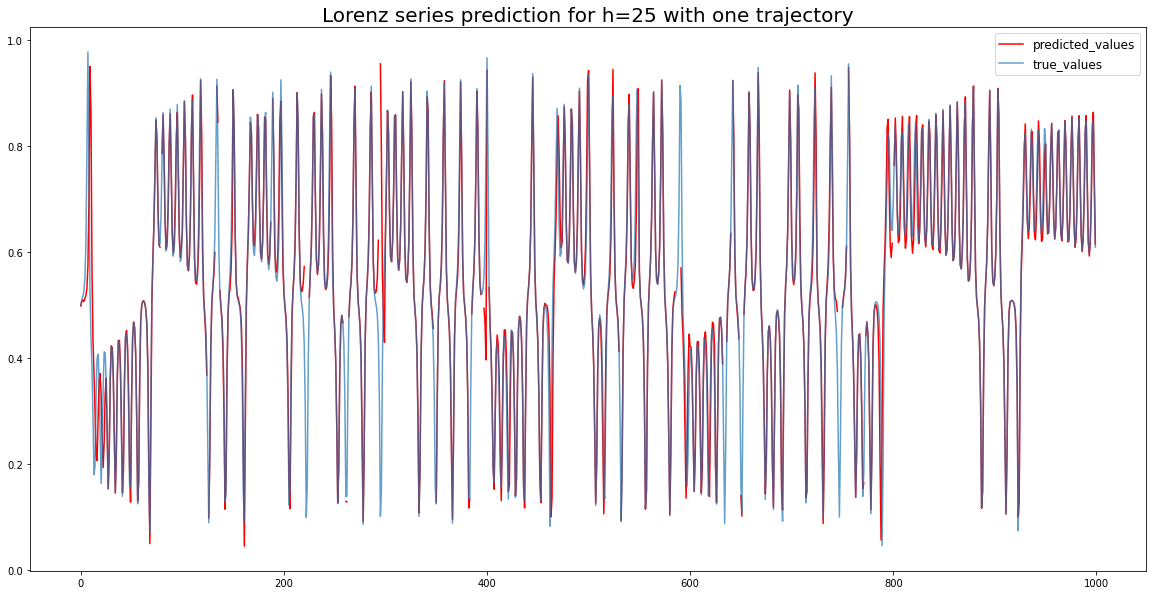

In [13]:
pp.plot_predictions(pred1, y_true, 'Lorenz series prediction for h=25 with one trajectory', 1000)

The results seem legit. So, I'd test the algorithm for h=100

## One trajectory no clustering for lorenz series with h=100

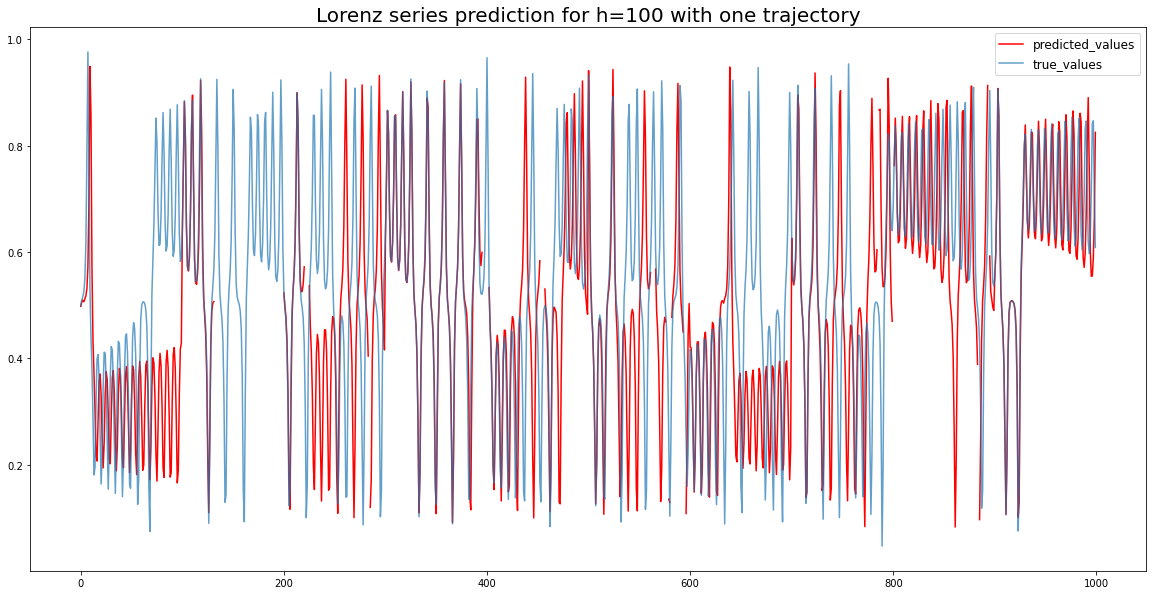

In [15]:
pp.plot_predictions(pred2, y_true, 'Lorenz series prediction for h=100 with one trajectory', 1000)

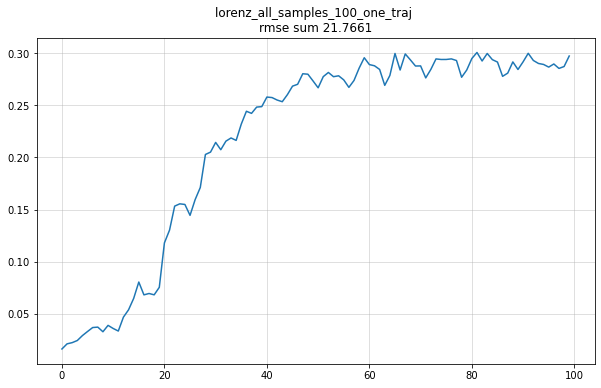

21.766071483735132


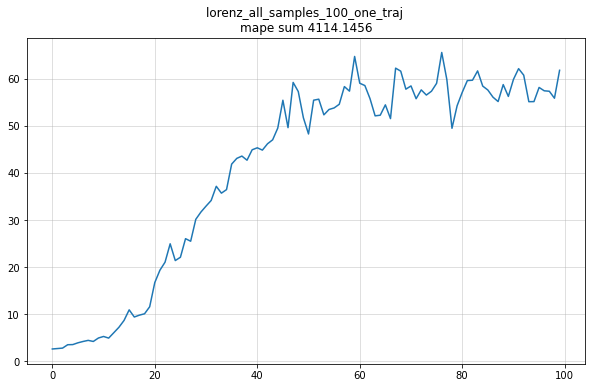

4114.145625022421


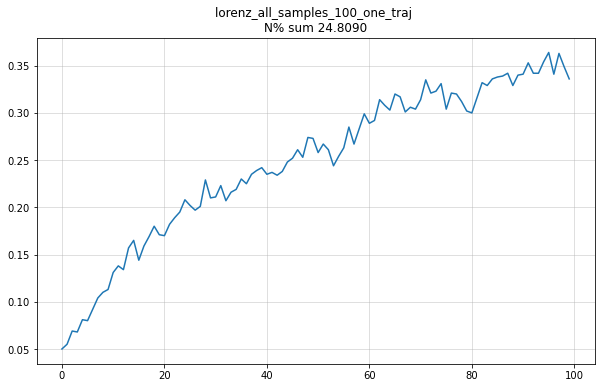

24.808999999999994


In [433]:
plot_metrics(params4, 'lorenz_all_samples_100_one_traj')

Let's visualize the predictions:

100%|██████████| 10/10 [03:49<00:00, 22.98s/it]


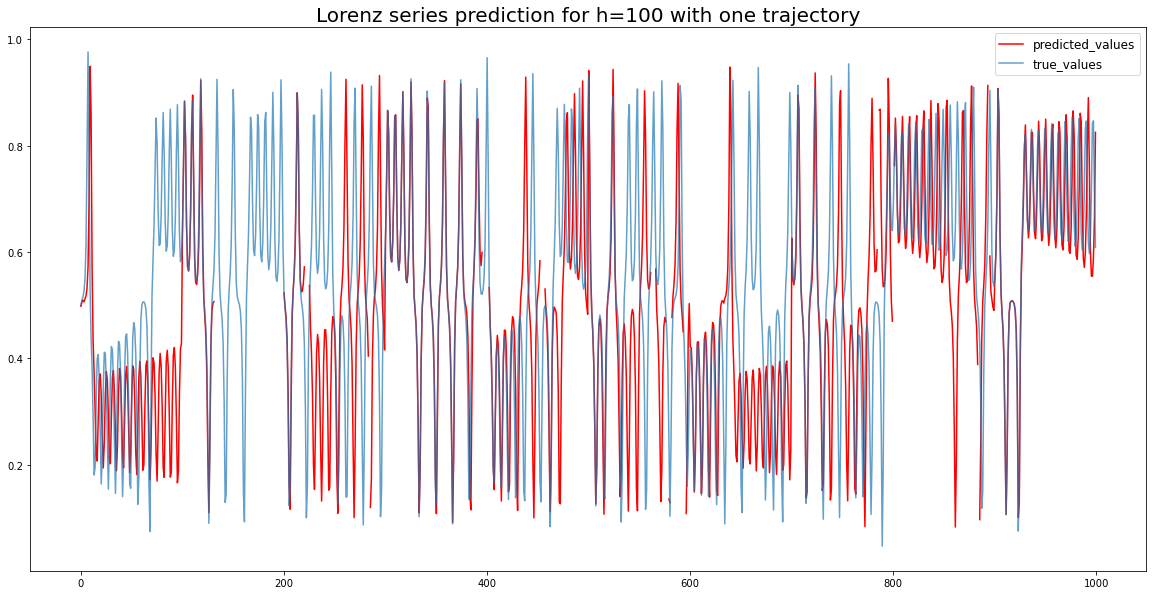

In [447]:
pred_vis = lorenz_pred_samp.predict(100, sample_size=10, noise=False, step=100)
plot_predictions(pred_vis, y_true, 'Lorenz series prediction for h=100 with one trajectory', 1000)

The algorithm seems to be predicting too hard from the pattern_samples. Let's check the predictions on the clustered version:

## Clustered version Lorenz h=25 one traj

100%|██████████| 40/40 [00:39<00:00,  1.01it/s]


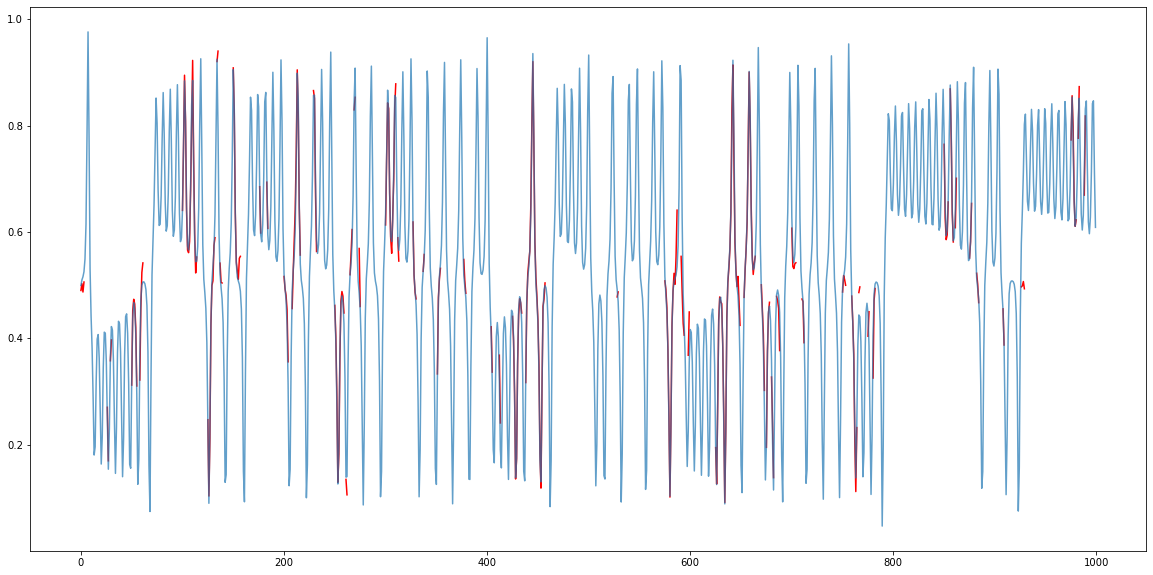

In [150]:
preds3 = lorenz_pred_clustered.predict(25, sample_size=40, noise=False, step=25)
f_preds3 = np.ravel(preds3)
plt.figure(figsize=(20,10))
plt.plot(range(1000), [np.float64(i) if i !='N' else np.nan for i in f_preds3], color='r')
plt.plot(y_true[:1000], alpha=0.7)

## Clustered version Lorenz h=100 one traj

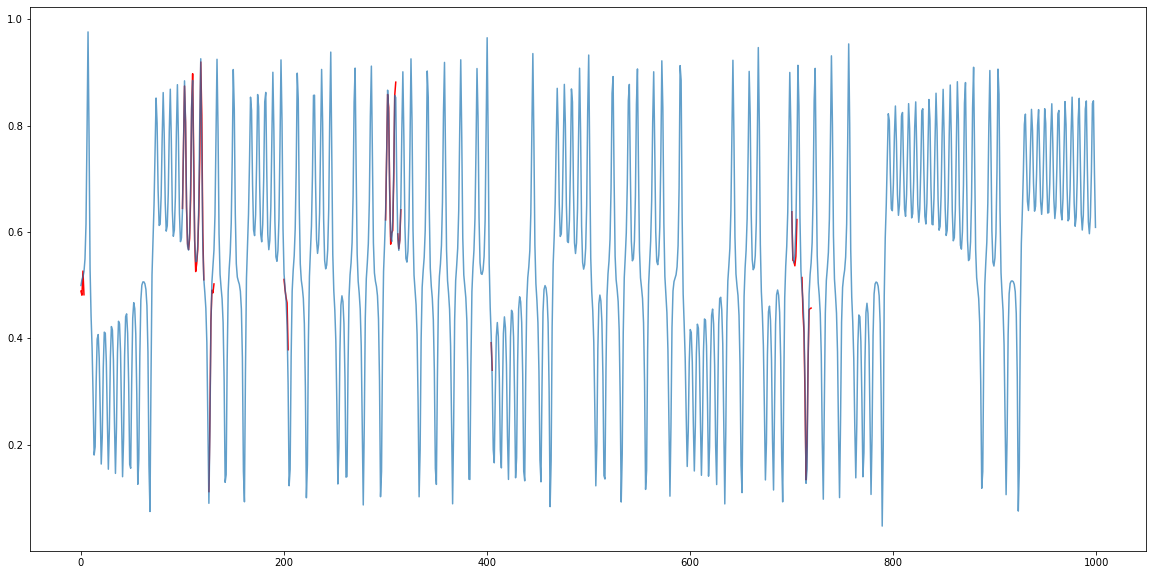

In [364]:

lorenz_one_traj = np.ravel(pp[0])
plt.figure(figsize=(20,10))
plt.plot(range(1000), [np.float64(i) if i !='N' else np.nan for i in lorenz_one_traj], color='r')
plt.plot(y_true[:1000], alpha=0.7)

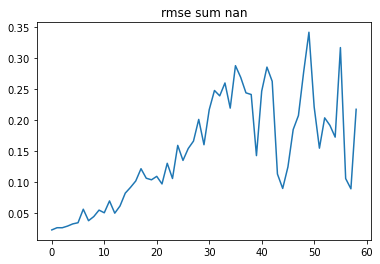

nan


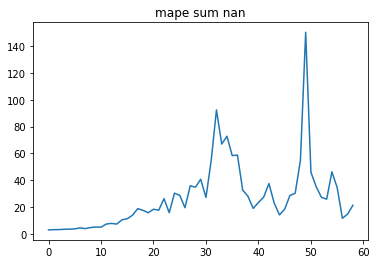

nan


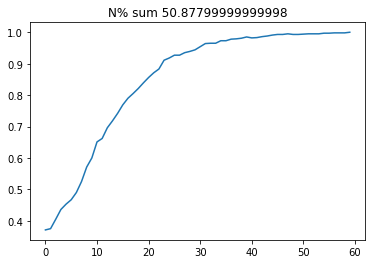

50.87799999999998


In [461]:
plt.plot(params_lorenz_mot1[0])
plt.title('rmse sum' +' '+ str(sum(params_lorenz_mot1[0])))
plt.show()
print(sum(params_lorenz_mot1[0]))

plt.plot(params_lorenz_mot1[1])
plt.title('mape sum' +' '+ str(sum(params_lorenz_mot1[1])))
plt.show()
print(sum(params_lorenz_mot1[1]))

plt.plot(params_lorenz_mot1[2])
plt.title('N% sum' +' '+ str(sum(params_lorenz_mot1[2])))
plt.show()
print(sum(params_lorenz_mot1[2]))

# Electricity consumption data-set

## Pattern_set h=100 results

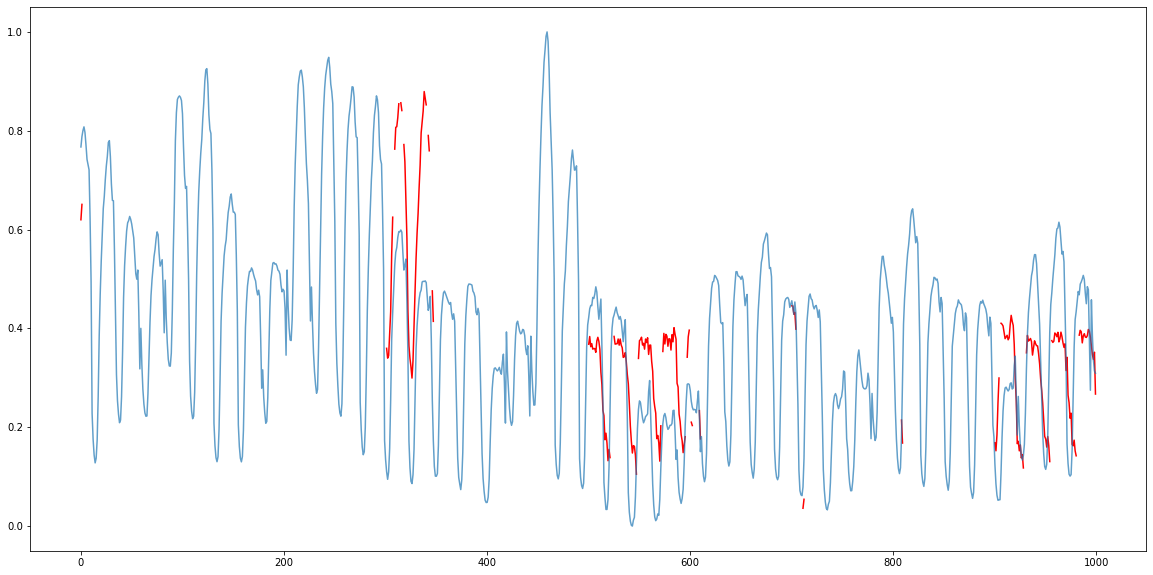

In [215]:
el_preds1 = np.ravel(el_pred1)
plt.figure(figsize=(20,10))
plt.plot(range(1000), [np.float64(i) if i !='N' else np.nan for i in el_preds1], color='r')
plt.plot(el_test[:1000], alpha=0.7)

The above plot doesn't look too promising

## Motifs h=100 results

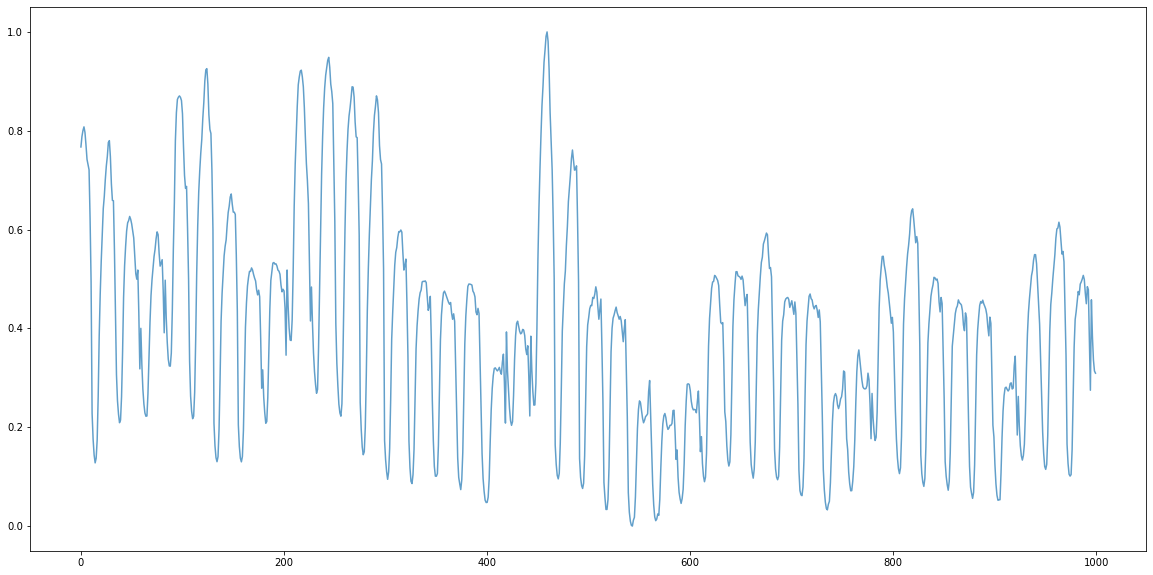

In [221]:
el_preds2 = np.ravel(pred_el_)
plt.figure(figsize=(20,10))
plt.plot(range(1000), [np.float64(i) if i !='N' else np.nan for i in el_preds2], color='r')
plt.plot(el_test[:1000], alpha=0.7)

Yep, clustering doesn't help either, from the first glance

## 12 hours ahead prediction horizon with samples

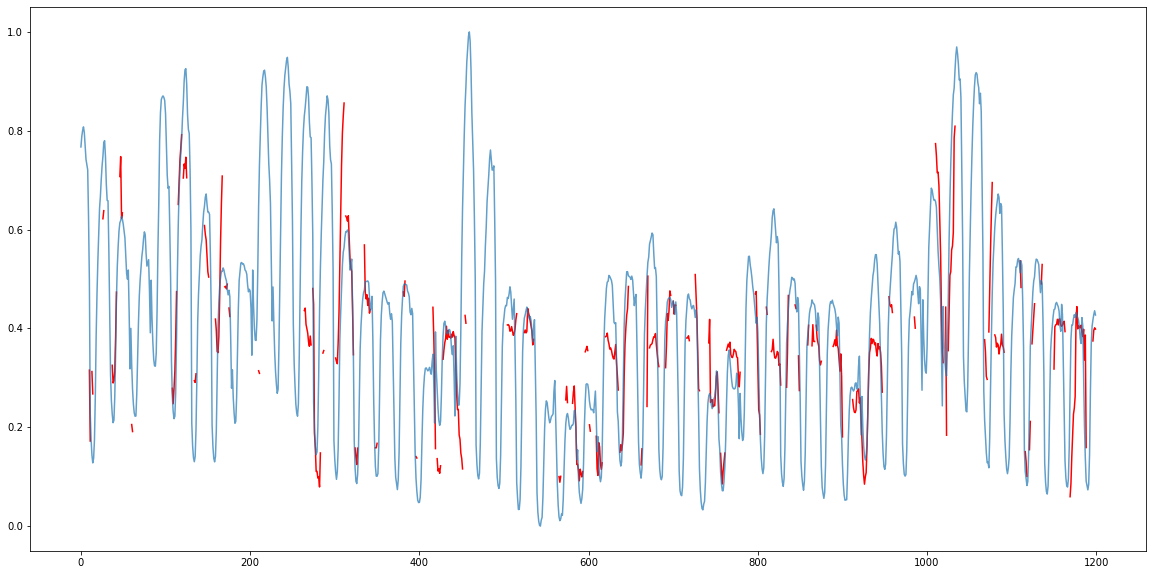

In [225]:
el_preds2 = np.ravel(el_pred2)
plt.figure(figsize=(20,10))
plt.plot(range(1200), [np.float64(i) if i !='N' else np.nan for i in el_preds2], color='r')
plt.plot(el_test[:1200], alpha=0.7)

Although on the smaller prediction horizon it looks better. I will try explore more depth by employing more patterns to look for matches. And create more clusters with r parameter to preserve more diversity

In [226]:
pattern_set_extended = [[i1, i2, i3] for i1 in np.arange(1, 16, 1)
               for i2 in np.arange(1, 16, 1)
               for i3 in np.arange(1, 16, 1)]

## Extended motifs set h=100

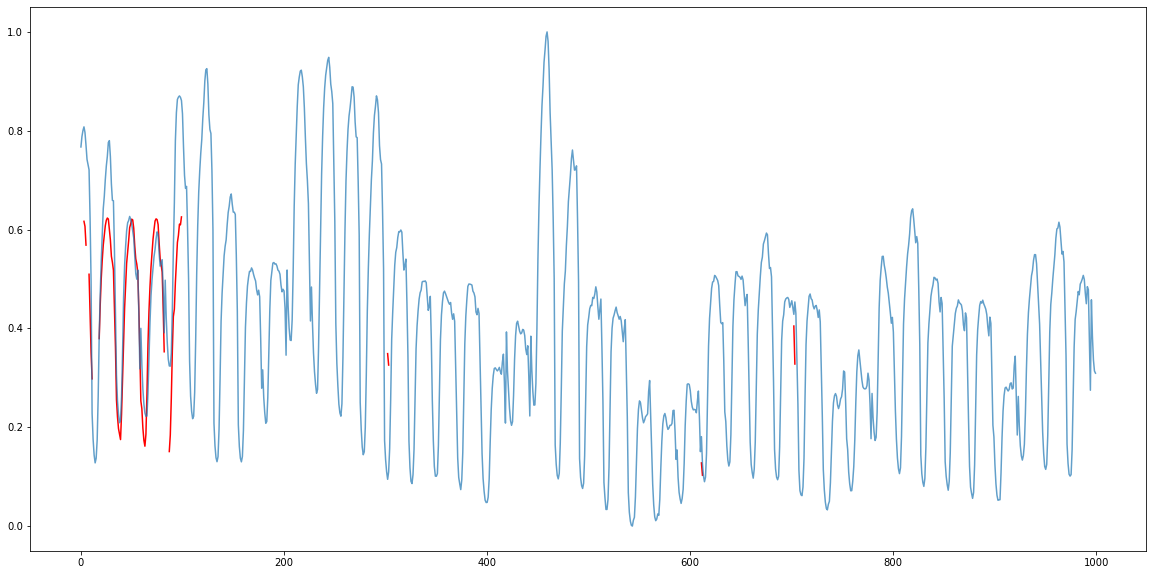

In [468]:
e = np.ravel(electro_pred1[0])[:1000]
plt.figure(figsize=(20,10))
plt.plot(range(1000), [np.float64(i) if i !='N' else np.nan for i in e], color='r')
plt.plot(el_test[:1000], alpha=0.7)

Extended motifs set seems to be doing better

In [464]:
p55 = electricity_pred_motifs_ext1.predict(100, sample_size=1000, noise=False, step=1)

100%|██████████| 1000/1000 [2:31:32<00:00,  9.09s/it] 


In [399]:
trr = [el_test[i: i + 100].tolist() for i in range(len(el_test[:1000]))]

In [469]:
params_no_noise_single1 = parameters_function1(p55[0], trr, 100)

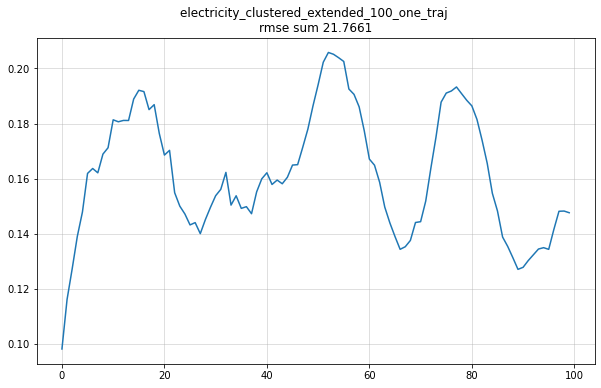

16.14880964377224


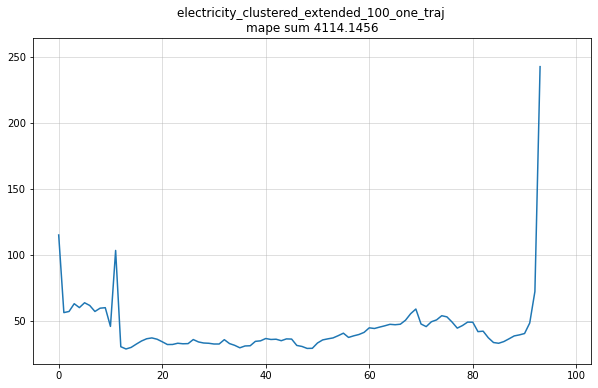

inf


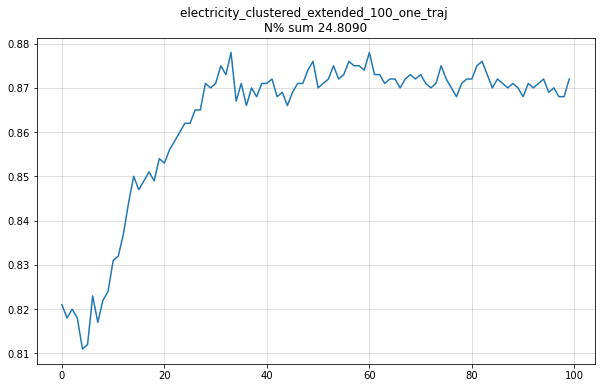

86.25999999999999


In [470]:
plot_metrics(params_no_noise_single1, 'electricity_clustered_extended_100_one_traj')